170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Category: [8]


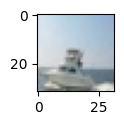

In [2]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import logging
tf.get_logger().setLevel(logging.ERROR)

cifar_dataset = keras.datasets.cifar10

(train_images,train_labels), (test_images,test_labels) = cifar_dataset.load_data()

print(f"Category: {train_labels[100]}")
plt.figure(figsize=(1,1))
plt.imshow(train_images[100])
plt.show()


In [3]:
train_labels.shape

(50000, 1)

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
train_images[100].shape

(32, 32, 3)

In [8]:
train_images[100][0].shape

(32, 3)

In [ ]:
train_images[100][0][0] # Color

array([213, 229, 242], dtype=uint8)